In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc,accuracy_score
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv('creditcard.csv')
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
227557,145122.0,0.742219,-2.233263,-2.586017,0.926070,-0.166322,-0.565984,1.318544,-0.518813,0.209721,...,0.472001,-0.148949,-0.556914,0.555106,-0.051313,0.306944,-0.220051,0.057214,715.26,0
78786,57701.0,-0.842139,1.301361,1.403994,0.080830,-0.409895,-0.759690,0.351477,0.421739,-0.717528,...,-0.110744,-0.333354,0.134989,0.605707,-0.286168,0.067689,0.159775,0.062071,9.87,0
9512,14160.0,-0.874878,5.135493,-9.522894,5.130648,3.099060,1.425837,-1.405333,2.961119,-1.101657,...,-0.116840,-0.458170,0.565003,0.243426,-0.592053,0.453539,-0.274714,-0.171430,1.00,0
62136,50145.0,1.113054,0.612248,0.718409,2.511400,-0.051639,-0.306445,0.202208,-0.056217,-0.906641,...,-0.111653,-0.344310,0.125946,0.385434,0.283826,-0.154169,0.003459,0.026205,12.16,0
173916,121695.0,2.063453,0.003071,-1.621522,0.014389,0.640003,-0.249409,0.155028,-0.175328,0.175997,...,0.280961,0.966468,-0.041594,0.288921,0.342333,-0.132884,-0.018340,-0.064248,2.69,0
209730,137681.0,-0.027420,0.391822,-0.613687,-0.686044,1.002067,0.219853,0.905147,0.081907,-0.194872,...,0.058140,0.008904,0.195314,-0.240971,-0.655992,0.273822,0.047103,0.125894,111.40,0
209223,137464.0,-0.258775,-0.293525,-0.055149,-0.951607,-1.608397,-0.709956,0.711733,0.209693,0.622839,...,0.422069,0.844278,0.771256,0.447544,-0.757731,0.603197,-0.191724,-0.048336,267.10,0
129242,79009.0,1.114252,0.237061,0.246564,1.162124,-0.229774,-0.914917,0.390539,-0.319770,-0.208758,...,0.082521,0.190239,-0.173147,0.434588,0.703628,-0.339726,0.008854,0.034771,72.13,0
137000,81973.0,-1.864303,0.649243,1.274500,1.212280,-0.625560,0.147591,-0.432380,0.830883,0.216980,...,0.196973,0.910733,0.074971,0.121362,-0.061845,-0.178858,-0.099270,-0.353463,2.00,0
236757,148938.0,2.029836,-0.273515,-1.846827,0.278403,0.262061,-0.845163,0.301816,-0.188287,0.438534,...,-0.021500,-0.028198,0.006856,-0.481804,0.138625,0.574483,-0.118295,-0.091487,29.99,0


In [11]:
df.shape


(284807, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

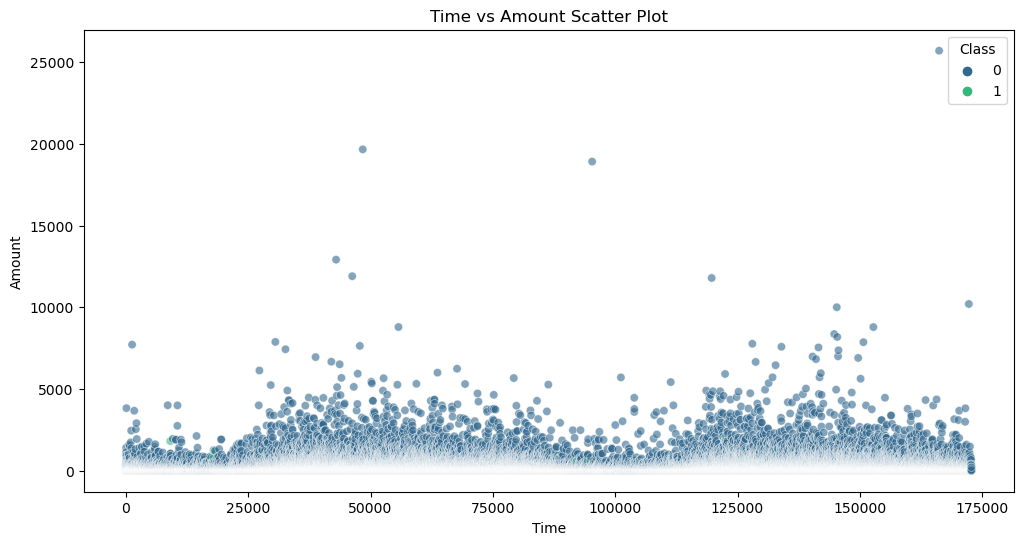

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class', palette='viridis', alpha=0.6)
plt.title('Time vs Amount Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class')
plt.show()

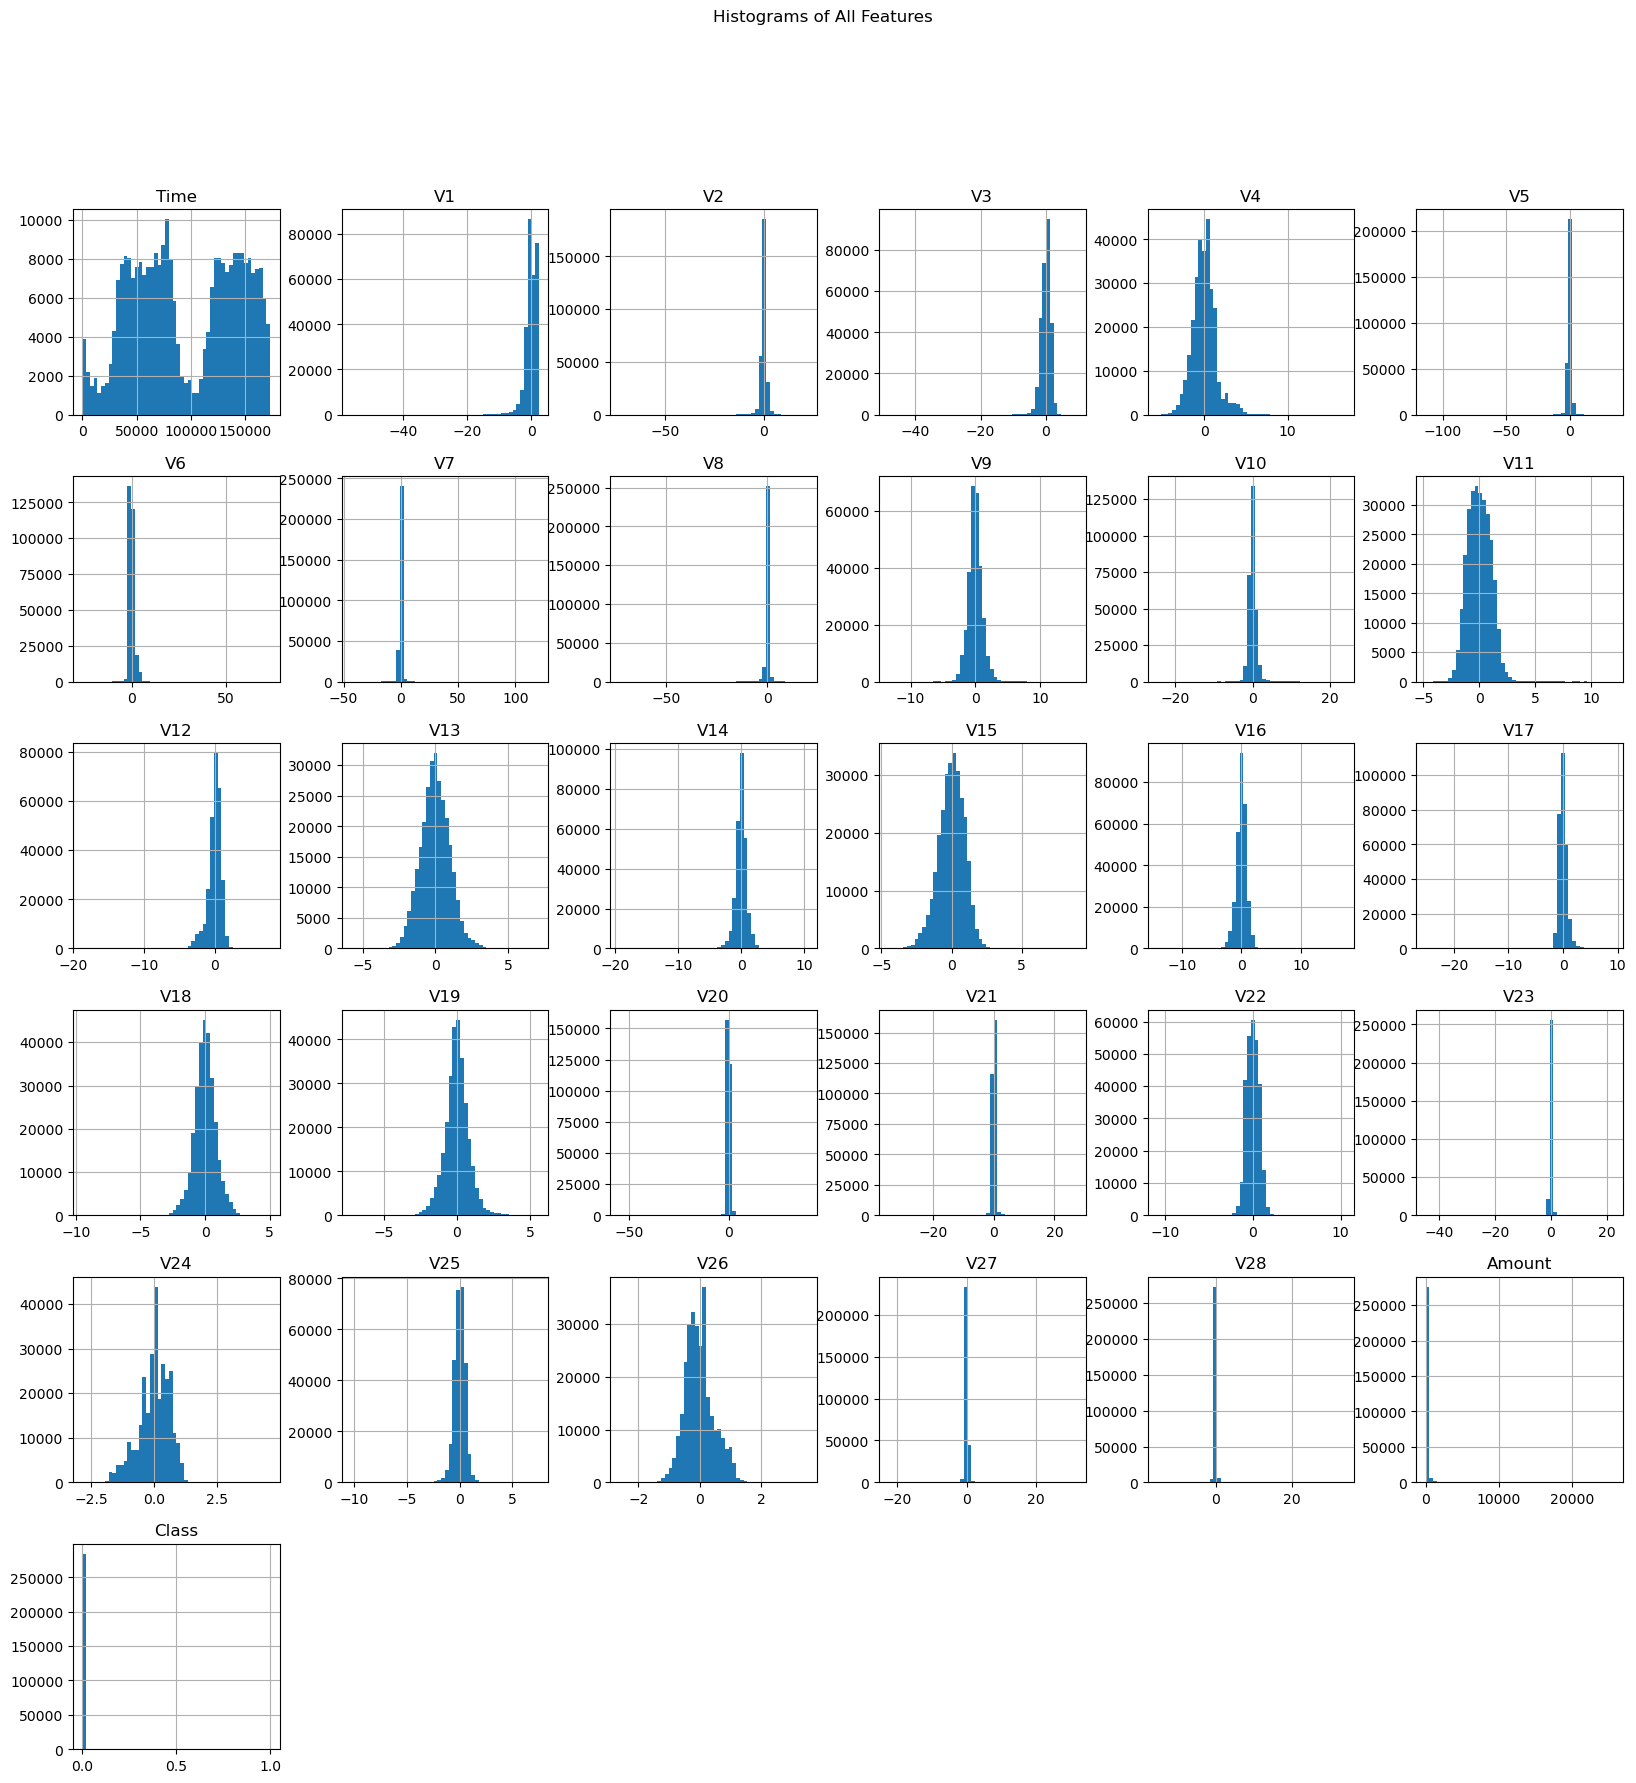

In [17]:
df.hist(figsize=(20, 20), bins=50)
plt.suptitle('Histograms of All Features')
plt.show()

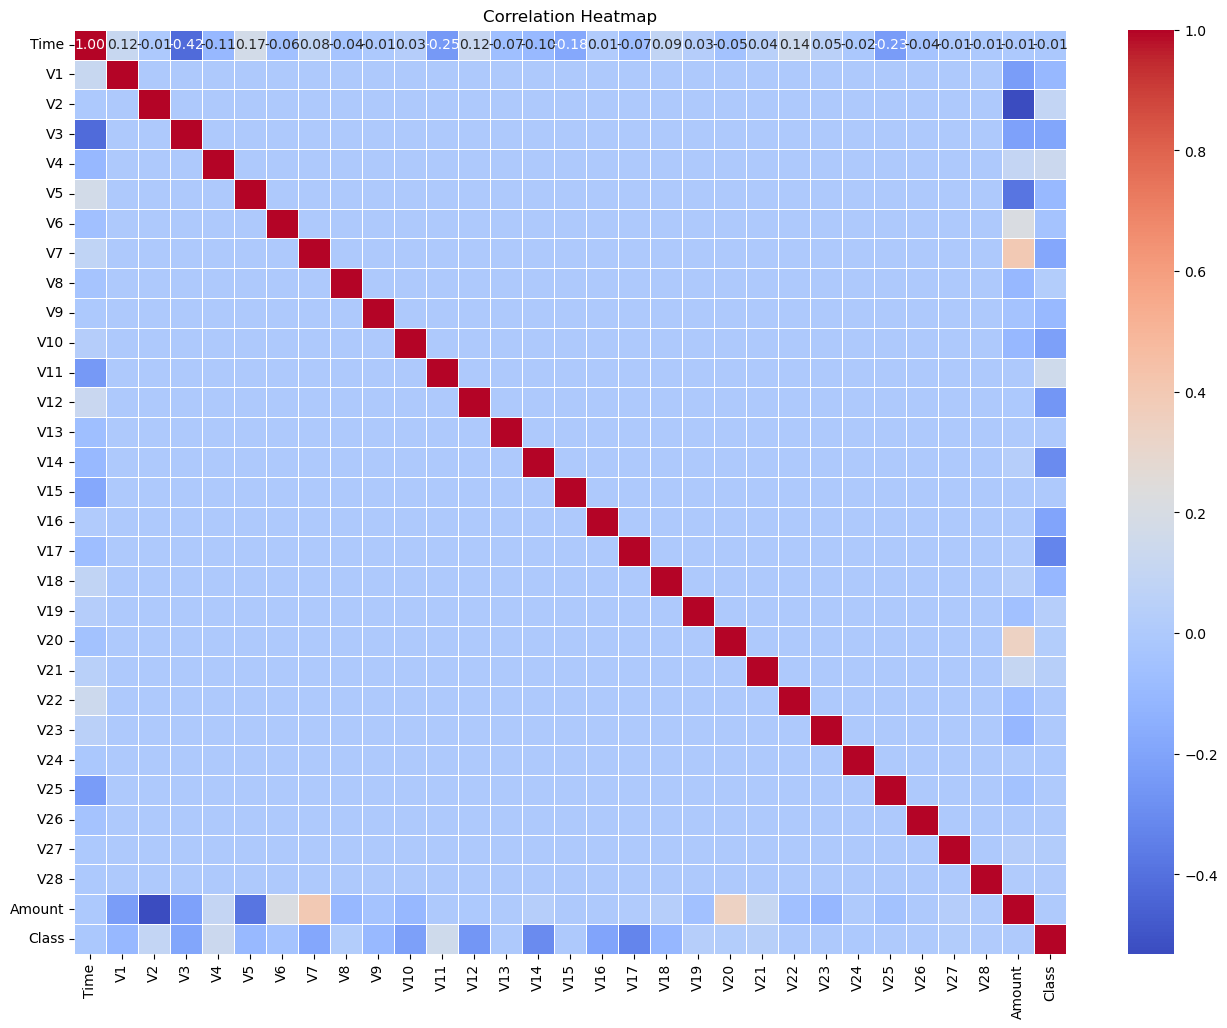

In [19]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [23]:
y_pred = log_reg_model.predict(X_test)
y_pred_prob = log_reg_model.predict_proba(X_test)[:, 1]
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9990914876341372
Testing Accuracy: 0.9989466661985184


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.50      0.62        98

    accuracy                           1.00     56962
   macro avg       0.91      0.75      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [27]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score: ',accuracy)

Accuracy score:  0.9989466661985184



ROC-AUC Score: 0.951663223674388


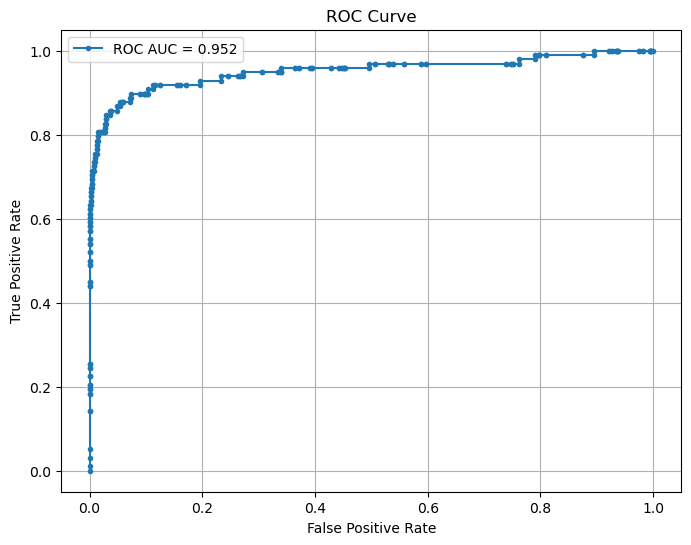

In [29]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc}")

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'ROC AUC = {roc_auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

Area Under the Precision-Recall Curve: 0.5630006635949719


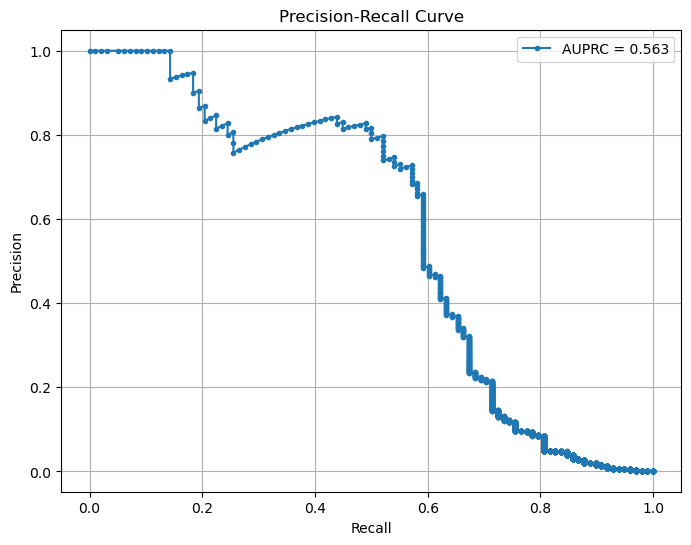

In [33]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
auprc = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve: {auprc}")

# Precision-Recall Curve 
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUPRC = {auprc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

Confusion Matrix:
[[56853    11]
 [   49    49]]


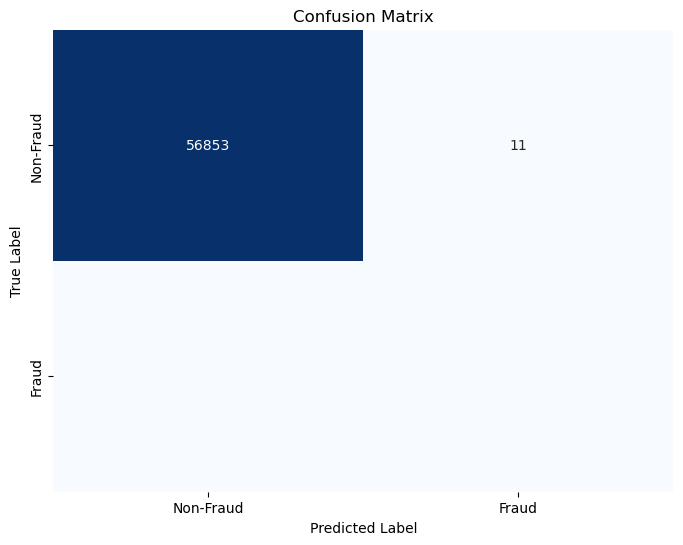

In [35]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()